In [8]:
%run "curve_fit_.ipynb"
%run "data_processing_.ipynb"
%run "evaluation_functions_.ipynb"
%run "fitting_functions_.ipynb"
%run "get_temperature_.ipynb"
%run "load_data_.ipynb"
%run "get_backbround_average_.ipynb"
%run "frame_vs_temperature.ipynb"

# 5mm frame figures

### input: folder path (which contains all velocity folders)

In [9]:
all_files, fivemm_files, velocity_path_list, velocity_list, used_frame_num = get_needed_files("/Users/chiaentsai/Box/MURI-SARA/Thermoreflectance/Joanne/12102022")
back_intensity_list = get_background_average(fivemm_files)
power_list = get_powers(all_files)

## 5mm frame figures (no background)

In [3]:
for I, v in enumerate(list(fivemm_files.keys())):
    for i, item in enumerate(fivemm_files[v]):
        original = get_blue(item)
        back = back_intensity_list[I]
        fig = original - back
        plt.imshow(fig)
        plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/5mm_frame_noback_figure/{}mm_4mmframe_{}.png".format(v,i), format="PNG")
        plt.close()

# temperature vs frame

In [73]:
# for i, (key, value) in enumerate(all_files.items()):
#     power = [int(x) for x in power_list[i]][1:]
#     files = all_files[key]
    
#     for p in power:
#         temp_list = []
#         for file in files:
#             if "_{}W_".format(p) in str(file):
#                 temp = get_peak_Tem(file, back_intensity_list[i], poly5, poly5, 0.00018)
#                 temp_list.append(temp)
#         plt.plot(temp_list)

#     plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Temp_vs_frame/{}mmpersec".format(key), format="PNG")
#     plt.close()

KeyboardInterrupt: 

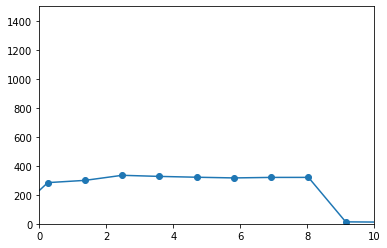

In [11]:
for i, (key, value) in enumerate(all_files.items()):
    power = [int(x) for x in power_list[i]][1:]
    files = all_files[key]
    
    for p in power:
        temp_list = []
        for file in files:
            if "_{}W_".format(p) in str(file):
                temp = get_peak_Tem(file, back_intensity_list[i], two_lorentz, two_lorentz, 0.000169)
                temp_list.append(temp)
                
        #convert the frame number to position
        #x = [(frame-2.7)*int(key)/92.59 for frame in range(1,len(temp_list)+1)] 
        
        x = [(frame/92.59 - shutter_delay)*int(key) for frame in range(0,len(temp_list))] 
        
        
        plt.plot(x, temp_list, marker="o")
        
        #limit temperature to 1500C
        plt.ylim(0,1500)
        
        #limit position to 1-10mm
        plt.xlim(0,10)

    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Temp_vs_frame/{}mmpersec".format(key), format="PNG")
    plt.close()